节点个数： 22
边数为： 53


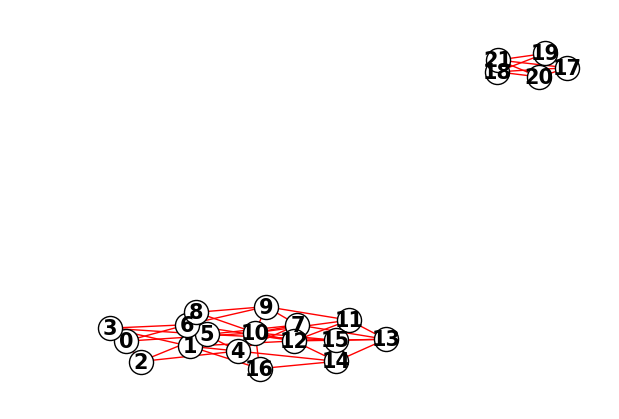

In [8]:
#录入数据，输出网络G
import xlrd
import networkx as nx
import sys
import matplotlib.pyplot as plt
book=xlrd.open_workbook('001.xlsx')
sheet=book.sheet_by_name('001')

K=2
G=nx.Graph()
G_test=nx.DiGraph()
for i in range(1,sheet.nrows):
    if(sheet.cell(i,0).value!=' ' and sheet.cell(i,1).value!=''):
        G.add_edge(int(sheet.cell(i,0).value),int(sheet.cell(i,1).value),weight=1)
# 此时完成了数据导入G中
print('节点个数：',G.number_of_nodes())
print('边数为：',G.number_of_edges())
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,font_size =15,node_color = 'w',edge_color = 'r',font_weight='bold')
plt.show()
#初始化 N-次数矩阵
N_cishu=[]

t_c=[0]*K
for i in G:
    N_cishu.append([1,1])
    
time=0
#初始化能量矩阵
E=[]
for i in range(K):
    E.append([0.5])
    for j in G:
        E[i].append(0.5)
sanjiao=0.2


0 0 3
1 1 8
3
8


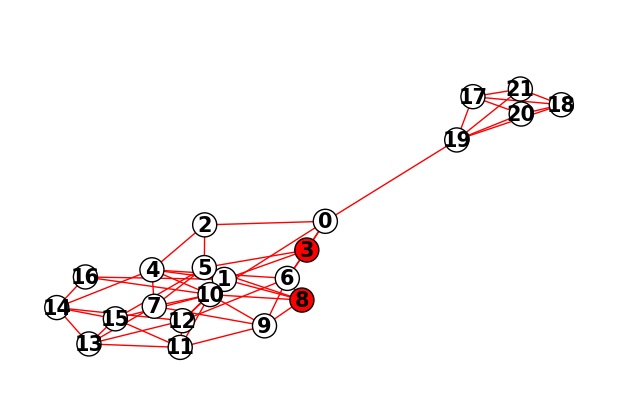

[[1, 1], [1, 1], [1, 1], [2, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 2], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]


In [2]:
#随机投入两个点 画出来
import random
# lizi=[20,12]
lizi=random.sample(G.nodes(),K)
t=0
for i in range(K):
    N_cishu[lizi[i]][t]+=1
    print(i,t,lizi[i])
    t+=1

pos = nx.spring_layout(G)
node_color=[0]*len(G)
for i in G:
    if(i in lizi):
        node_color[i]='r'
        print(i)
    else:
        node_color[i]='w'#获得G中各个节点的设置值；

# for i in range(len(lizi)):
#     node_color[lizi[i]]='r'
nx.draw(G,pos,with_labels=True,font_weight='bold',font_size =15,node_color =node_color,edge_color = 'r')
plt.show()
print(N_cishu)

In [9]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21))

In [3]:
# #写了个邻居节点的函数，返回0项是邻居节点，返回1项是度中心性
# def nei(n):
#     neibor=[]
#     du=0
#     for target in G:
#         if((n,target) in G.edges() or (target,n) in G.edges()):
#             neibor.append(target)
#             du+=1
#     return neibor

In [41]:
#上面那个写的不好 时间复杂大
#写了个邻居节点的函数，返回0项是邻居节点，返回1项是度中心性
length=list(nx.shortest_path_length(G))
def nei(n):
    neibor=[]
    for target in G:
        try:
            if (length[n][1][target]==1):
                neibor.append(target)
        except:
            continue

    return neibor

In [42]:
#优先转移矩阵 随机游走矩阵
def rand(i,j):
    return 1/G.degree(i)

def pref(i,j,k):#这个是 第k个粒子在第i个节点邻居节点j的 优先转移的概率 
    num_kong=0
    for j_t in nei(i):#邻接节点
        a=N_kong(j_t)
        num_kong+=a[0][k]
    return N_kong(j)[0][k]/num_kong

def N_kong(i):
    N_kong=[]
    total_N=0
    for k in range(K):
        total_N+=N_cishu[i][k]
    for k in range(K):
        N_kong.append(N_cishu[i][k]/total_N)
    return N_kong,total_N#返回两个量 第一个是控制矩阵，当前粒子访问节点i的相对频率，第二个是节点i被访问的总次数

In [43]:
# 这个是检测不同粒子对于的转移概率的
# for k in range(len(lizi)):
#     rand_pref=[]
#     for j in nei(lizi[k]):
#         rand_pref.append(0.2*rand(lizi[k],j)+0.8*pref(lizi[k],j,k))
#     print(k,rand_pref)

In [44]:
import random#这是一个按照概率选取数字的函数
def rand_pick(seq, probabilities):
    x = random.uniform(0, 1)
    cumprob = 0.0
    for item , item_pro in zip(seq, probabilities):
        cumprob += item_pro
        if x < cumprob:
            break
    return item

# value_list = [0 , 1, 2]
# probabilities = [0.8 , 0.1, 0.1]
# for i in range(10):
#     print(rand_pick(value_list, probabilities))

In [45]:
#现在要设置一个能量变量
def E_test(k,j,lizi_t_1):  
    test=0
    if (node_color[lizi[k]]=='#00BFFF' and node_color[lizi_t_1]=='b')or(node_color[lizi[k]]=='#00FF00' and node_color[lizi_t_1]=='g'):
        E[k][j]+=sanjiao
    else:
        E[k][j]-=sanjiao
    if(E[k][j]>1):
        E[k][j]=1
    elif(E[k][j]<0):
        E[k][j]=1
        test=1
        print(k,j)
    return test
#选出了那个第k个粒子能量最大的点        
def E_best(k):
    return(E[k].index(max(E[k])))
# def color_test(k,lizi_t_1):
#     return(node_color[lizi[k]]=='b' and node_color[lizi_t_1[k]]=='#ADD8E6')or(node_color[lizi[k]]=='g' and node_color[lizi_t_1[k]]=='#90EE90')
def color_test(k,lizi_t_1):
    return(node_color[lizi[k]]==node_color[lizi_t_1[k]])or(node_color[lizi[k]]==node_color[lizi_t_1[k]])

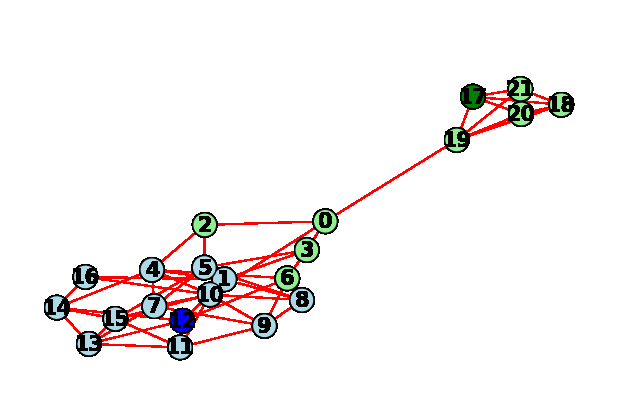

In [49]:
#游走动态演示  初始颜色没更新
while(time<1000):
    time+=1
    lizi_t_1=[0]*K
    node_color[lizi[0]]='#90EE90'
    node_color[lizi[1]]='#ADD8E6'
    if(N_cishu[lizi[0]][0]>N_cishu[lizi[0]][1]):
        node_color[lizi[0]]='#90EE90'
    if(N_cishu[lizi[0]][1]>N_cishu[lizi[0]][0]):
        node_color[lizi[0]]='#ADD8E6'
    for k in range(len(lizi)):#当前算第k个粒子
        rand_pref=[]
        for j in nei(lizi[k]):#j是粒子邻居
            rand_pref.append(0.2*rand(lizi[k],j)+0.8*pref(lizi[k],j,k))
        lizi_t_1[k]=lizi[k]
        lizi[k]=rand_pick(nei(lizi[k]),rand_pref)
        
        
        if (color_test(k,lizi_t_1)):
            E[k][lizi[k]]=E[k][lizi[k]]+sanjiao
#             print(k,lizi[k],E[k][lizi[k]],'+++')
        else:
            E[k][lizi[k]]-=sanjiao
#             print(k,lizi[k],E[k][lizi[k]],'---')
#             print(node_color[lizi[k]],node_color[lizi_t_1[k]],k,lizi,lizi_t_1)
        if(E[k][lizi[k]]>1):
            E[k][lizi[k]]=1
        elif(E[k][lizi[k]]<0):
#             print(lizi[k],E_best(k))#这个是显示粒子回家的
            E[k][lizi[k]]=0  
            lizi[k]=E_best(k)
        N_cishu[lizi[k]][k]+=1    
    node_color[lizi[0]]='g'
    node_color[lizi[1]]='b'
        

    nx.draw(G,pos,with_labels=True,font_weight='bold',font_size =15,node_color =node_color,edge_color = 'r')
plt.show()

In [205]:
N_cishu

[[21, 38],
 [50, 32],
 [57, 4],
 [20, 27],
 [59, 20],
 [83, 10],
 [14, 55],
 [64, 15],
 [24, 43],
 [11, 42],
 [68, 43],
 [7, 47],
 [39, 45],
 [36, 31],
 [53, 15],
 [42, 22],
 [47, 7],
 [8, 38],
 [2, 43],
 [10, 50],
 [4, 38],
 [3, 57]]

In [207]:
E[1]#能量上限是不是可以调大点

[1,
 0.6000000000000001,
 0.8,
 1,
 0.3,
 0.20000000000000007,
 1,
 0,
 0.8,
 1,
 0.20000000000000007,
 1,
 1,
 0.4000000000000001,
 0.49999999999999994,
 5.551115123125783e-17,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5]

In [81]:
lizi_t_1

[19, 17]